## **Implémentation d'un réseau de neurone à une couche**

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

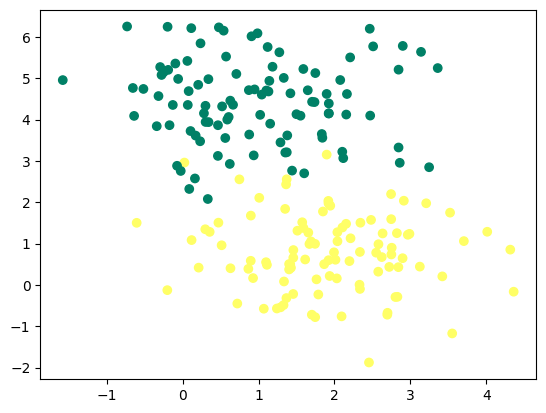

In [48]:
X, y = make_blobs(n_samples=200, n_features=2, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)
X.shape, y.shape

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()

#### Fonction d'initialisation

In [49]:
def initialisation(X):
    w = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (w, b)

w, b = initialisation(X)
w, b

(array([[2.2408932 ],
        [1.86755799]]),
 array([-0.97727788]))

#### Fonction pour le modèle
$z = w_1X_1 + ... + W_nX_n$

$A = \frac{1}{1-e^{-z}} $

In [50]:
def model(X, w, b, eps = 1e-15):
    z = X @ w + b
    A = 1 / (1 + np.exp(-z))
    A = np.clip(A, eps, 1 - eps)  # évite log(0)
    
    return A
A = model(X, w, b)


### Fonction coût
$$ \mathcal L = -\frac{1}{m}\sum_{i = 1}^{m}y_i\times\log(a_i) + (1-y_i)\times\log(1-a_i)$$

In [51]:
def Log_loss(A, y):
    return - 1 / len(y) * sum(y * np.log(A) + (1 - y) * np.log(1 - A))

A = model(X, [np.random.randn(1),np.random.randn(1)], 1)
Log_loss(A, y)

array([0.83301901])

### Gradient
$$w = w - \alpha \times \frac{\partial \mathcal L}{\partial w}$$
$$b = b - \alpha \times \frac{\partial \mathcal L}{\partial b}$$

In [52]:
def gradients(X, A, y):
    dw = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dw, db)

def update(dw, db, w, b, learning_rate = 0.1):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return (w, b)

dw, db = gradients(X, A, y)  
update(dw, db, w, b)  

(array([[2.20296841],
        [1.710534  ]]),
 array([-1.00981169]))

#### Fonction de prédiction

In [53]:
def predict(X, w, b):
    A = model(X, w, b)
    #print(A)
    return A >= 0.5

#### Fonction du neurone artificiel

In [54]:
from tqdm import tqdm

def artificial_neurone(X, y, learning_rate = 0.1, n_iter = 100):
    #initialisation
    np.random.seed(0)
    w, b = initialisation(X)
    Loss = []

    for i in tqdm(range(n_iter)):
        A = model(X, w, b)
        Loss.append(Log_loss(A, y))
        dw, db = gradients(X, A, y)
        w, b = update(dw, db, w, b, learning_rate)

    #y_pred = predict(X, w, b)
    #print(accuracy_score(y, y_pred)) 
       
    #plt.plot(Loss)
    #plt.show()    

    return (w, b)

w, b = artificial_neurone(X,y)

100%|██████████| 100/100 [00:00<00:00, 4674.67it/s]


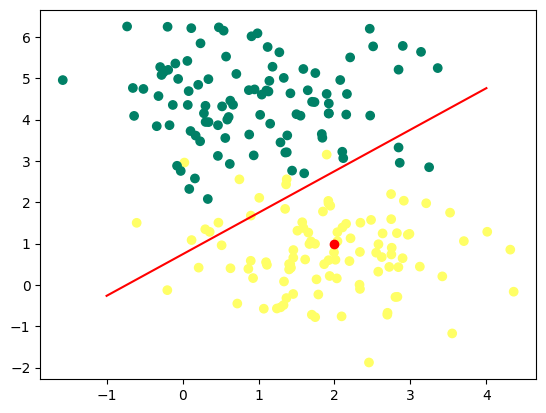

array([ True])

In [55]:
new_plant = np.array([2,1])

x0 = np.linspace(-1, 4, 100)
x1 = (-w[0] * x0 - b ) / w[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='red')
plt.plot(x0, x1, c = 'red')
plt.show()
predict(new_plant, w, b)

In [56]:
lim = 10
h = 100
w1 = np.linspace(-lim, lim , h)
w2 = w1
w11, w22 = np.meshgrid(w1, w2)
w11.shape, w22.shape
w_final = np.c_[w11.ravel(), w22.ravel()].T
w_final.shape

(2, 10000)

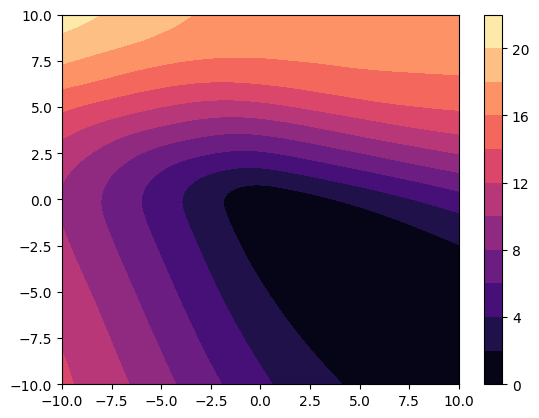

In [57]:
b = 0
z = X @ w_final + b
A = model(X, w_final, b)
Loss = (- 1 / len(y) * sum(y * np.log(A) + (1 - y) * np.log(1 - A))).reshape(w11.shape)
plt.contourf(w11, w22, Loss, 10, cmap = 'magma')
plt.colorbar()

## **Mise en application avec les données sur les chats et les chiens**

In [58]:
from utilities import load_data

In [59]:
X_train, y_train, X_test, y_test = load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1000, 64, 64), (1000, 1), (200, 64, 64), (200, 1))

In [60]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0., 1.]), array([500, 500]))
(array([0., 1.]), array([100, 100]))


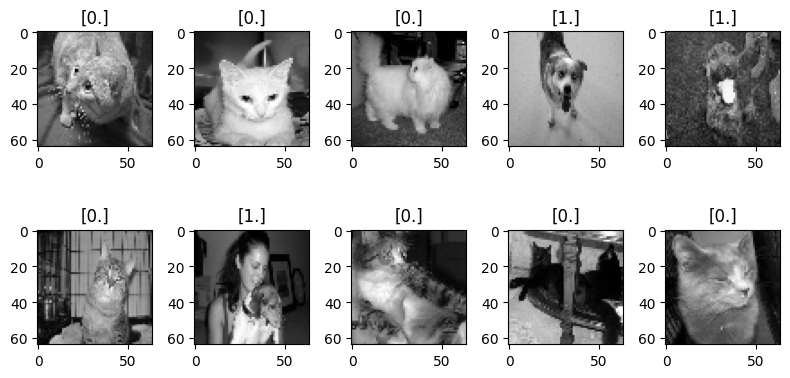

In [61]:
plt.figure(figsize=(8,5))
for i in range (1, 11):
    plt.subplot(2,5,i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()    

In [62]:
# transformation de chaque photo de 64x64 --> 4096
train_set = X_train.reshape(X_train.shape[0], -1)
test_set = X_test.reshape(X_test.shape[0], -1)

# normalisation des données
train_set = (train_set - np.mean(train_set, axis=0)) / np.std(train_set, axis=0)
test_set = (test_set - np.mean(test_set, axis=0)) / np.std(test_set, axis=0)


100%|██████████| 2/2 [01:46<00:00, 53.07s/it]


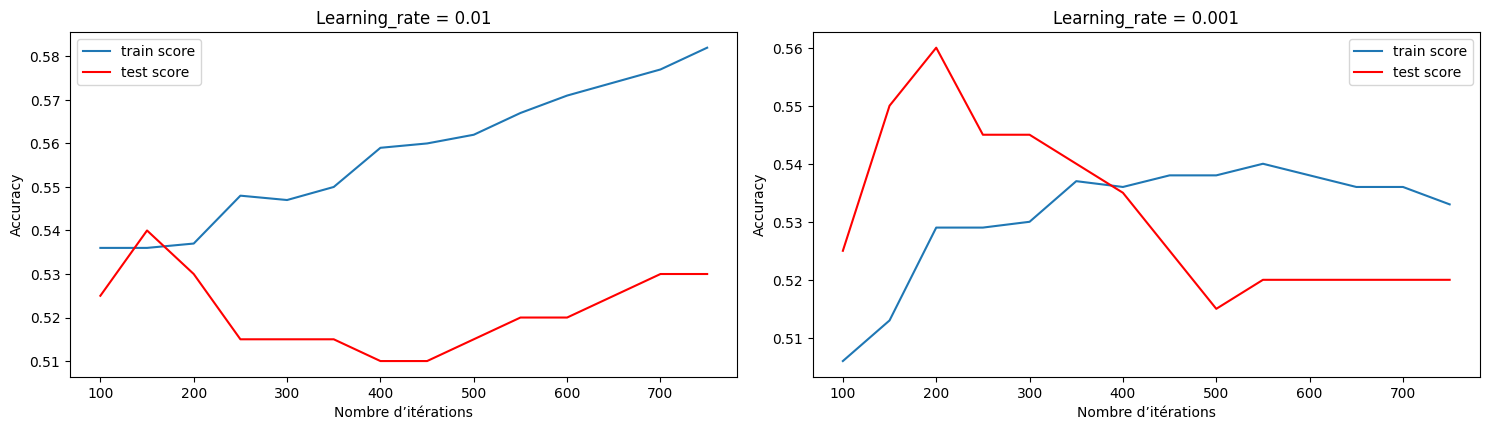

In [66]:
learning_rate = [0.01, 0.001]
n_iter = range(100, 800, 50)

plt.figure(figsize=(15,8))
i = 1

for k in tqdm(learning_rate):

    plt.subplot(2,2,i)
    train_score = []
    test_score = []

    for n in n_iter:
        w, b = artificial_neurone(train_set, y_train, k, n)
        
        y_pred_train = predict(train_set, w, b)
        y_test_pred = predict(test_set, w, b)

        score_train = accuracy_score(y_train, y_pred_train)
        score_test = accuracy_score(y_test, y_test_pred)

        train_score.append(score_train)
        test_score.append(score_test)

      

    plt.plot(n_iter, train_score, label = 'train score') 
    plt.plot(n_iter, test_score, c = 'red', label = 'test score')  
    plt.title(f'Learning_rate = {k}')
    plt.xlabel('Nombre d’itérations')
    plt.ylabel('Accuracy')
    plt.legend()
    
    i += 1

plt.tight_layout()    
plt.show()    

In [64]:
n_iter

array([100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340,
       360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600,
       620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860,
       880, 900, 920, 940, 960, 980])